In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def generate_vector(u_k, E_k):
    d = u_k.shape[0]
    A = np.linalg.cholesky(E_k)
    Z = np.matrix(np.random.normal(0,1,d)).T
    return (u_k + A * Z).T
u = np.array([3,5]).reshape(2,1)
E = np.array([12,3,3,1]).reshape(2,2)

N = 1000;
X = np.zeros((N,2))
for i in range(0,1000):
    X[i,:] = generate_vector(u,E)

In [2]:
X_mean = np.mean(X, axis = 0)
X_std = np.std(X,axis = 0)
print X_mean, X_std

X_standarized = (X - X_mean)/X_std
#print X_standarized #np.mean(X_standarized, axis = 0), np.std(X_standarized, axis = 0)

[ 3.25144915  5.05138419] [ 3.5492015   1.03514025]


In [3]:
S = np.cov(X_standarized.T)
print S

[[ 1.001001    0.87786173]
 [ 0.87786173  1.001001  ]]


In [4]:
D,V = np.linalg.eigh(S)
print D
print V

[ 0.12313927  1.87886273]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [5]:
Y = np.dot(V.T,X_standarized.T).T
print Y

[[  7.09610656e-02   8.45159709e-01]
 [  4.17157180e-01  -1.16529369e-03]
 [  3.91715574e-01  -1.58866939e+00]
 ..., 
 [  4.06312032e-01   3.60965276e-01]
 [  1.75295386e-01  -1.28524101e+00]
 [ -2.44401249e-01  -2.20150075e+00]]


In [6]:
D_bis = np.matrix(1/np.sqrt(D)).reshape(2,1)
Y_new = np.multiply(D_bis,Y.T).T
print Y_new

[[  2.02218944e-01   6.16582592e-01]
 [  1.18877984e+00  -8.50134945e-04]
 [  1.11627847e+00  -1.15900685e+00]
 ..., 
 [  1.15787424e+00   2.63340648e-01]
 [  4.99542215e-01  -9.37641989e-01]
 [ -6.96474357e-01  -1.60609530e+00]]


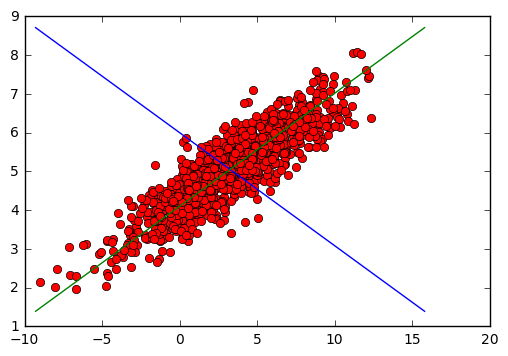

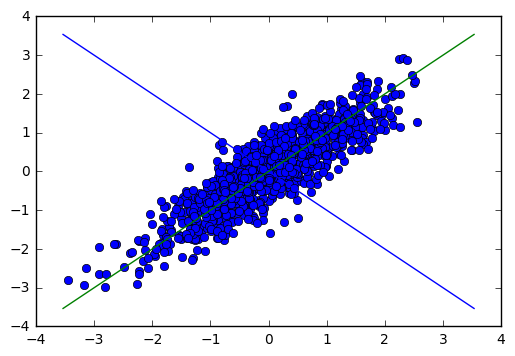

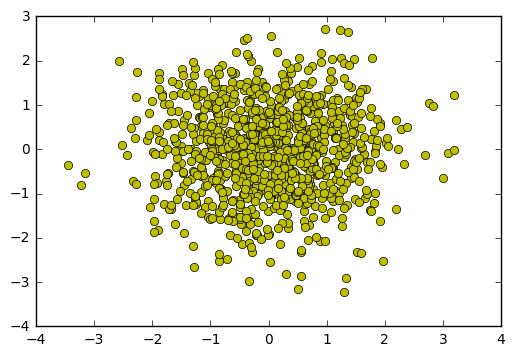

In [7]:
plt.plot(X[:,0],X[:,1],'ro')
plt.plot([X_mean[0] - 5 * V[0,0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], 
         [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]]) 

plt.plot([X_mean[0] - 5 * V[0,1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]],
         [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]]) 
plt.show()
plt.plot(X_standarized[:,0],X_standarized[:,1],'bo')
plt.plot([-5 * V[0,0] , 5 * V[0,0]], 
         [-5 * V[1,0] , 5 * V[1,0]]) 

plt.plot([-5 * V[0,1],5 * V[0,1]],
         [-5 * V[1,1],5 * V[1,1]]) 
plt.show()
plt.plot(Y_new[:,0],Y_new[:,1],'yo')
plt.show()



In [8]:
def staty(X):
    print "Mean:",np.mean(X,axis=0)
    print "Std:",np.std(X,axis=0)
    print "Cov:",np.cov(X.T)
    print "Corr:",np.corrcoef(X.T)
print X
staty(X)
staty(X_standarized)
staty(Y_new)

[[ 5.19442796  5.72194309]
 [ 2.20160011  5.3558714 ]
 [-1.7186526   4.17526822]
 ..., 
 [ 3.13764401  5.61299641]
 [-0.41400711  4.23895428]
 [-1.66021389  3.26109474]]
Mean: [ 3.25144915  5.05138419]
Std: [ 3.5492015   1.03514025]
Cov: [[ 12.60944073   3.22519494]
 [  3.22519494   1.07258793]]
Corr: [[ 1.          0.87698387]
 [ 0.87698387  1.        ]]
Mean: [  3.01314529e-16   2.99893443e-15]
Std: [ 1.  1.]
Cov: [[ 1.001001    0.87786173]
 [ 0.87786173  1.001001  ]]
Corr: [[ 1.          0.87698387]
 [ 0.87698387  1.        ]]
Mean: [[  5.44675416e-15   1.69997350e-15]]
Std: [[ 0.99949987  0.99949987]]
Cov: [[  1.00000000e+00  -3.21897997e-16]
 [ -3.21897997e-16   1.00000000e+00]]
Corr: [[  1.00000000e+00  -3.21897997e-16]
 [ -3.21897997e-16   1.00000000e+00]]


Mean: [  1.91180405e-15   2.32702746e-15]
Std: [ 0.35073656  1.37003061]
Cov: [[  1.23139271e-01  -1.57892829e-16]
 [ -1.57892829e-16   1.87886273e+00]]
Corr: [[  1.00000000e+00  -3.28258961e-16]
 [ -3.28258961e-16   1.00000000e+00]]


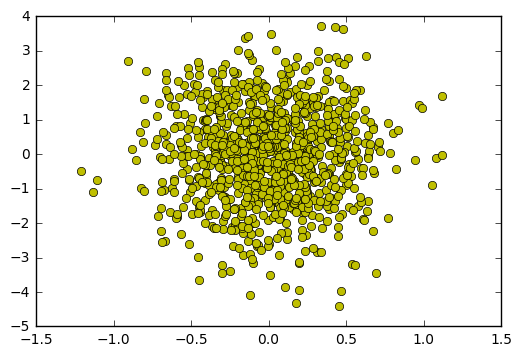

In [9]:
#bez dzielenenia przez pierwsiatki z wartosci wlasnych?? -> ma to znaczenie przy liczeniu odleglosci. Chodzi
#o to aby wszytskie mialy podobny wplyw( dlatego dzielimy przez ta wartosc wlasna) inaczej zmiana na jednej wspl
#mialaby duzo wiekszy wplyw niz inne -> tak naprawde zeby wariancja na kazdej osi byla 1
staty(Y)
plt.plot(Y[:,0],Y[:,1],'yo')
plt.show()

In [10]:
u = np.array([-21,-2,3,5,27,12]).reshape(3,2).T
X = np.zeros((N,2))
for i in range(0,N):
    rand = np.random.randint(0,3,1)[0]
    #print u[:,rand].reshape(2,1)
    X[i,:] = generate_vector(u[:,rand].reshape(2,1),E)

Srednia i odchylenie [ 3.04831941  5.02077311] [ 20.09144963   5.88064392]
[[-20.11857691  -1.64876315]
 [  0.83828418   5.39660153]
 [ 28.34524089  11.52823161]
 ..., 
 [  2.39498515   5.09035845]
 [  0.97297376   4.14050681]
 [ 27.91516297  11.57177024]]
Kowariancja [[ 1.001001    0.99690829]
 [ 0.99690829  1.001001  ]]
Wartosci wlasne [ 0.00409271  1.99790929]
Wektory wlasne [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


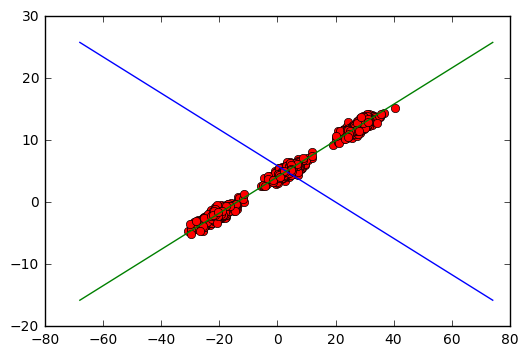

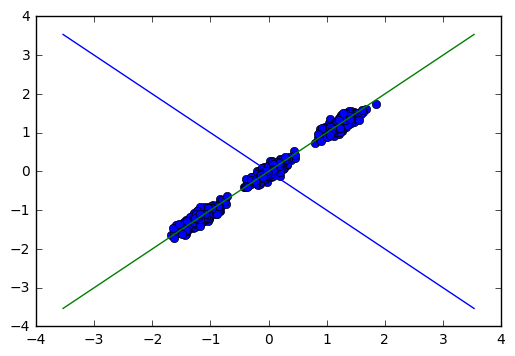

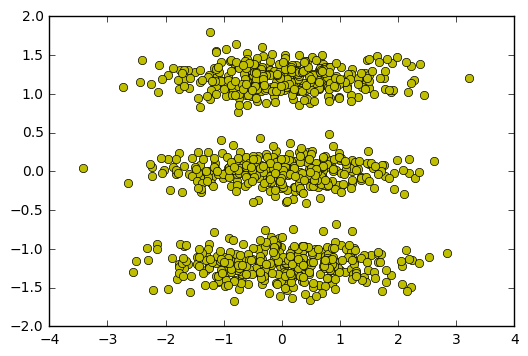

In [11]:
X_mean = np.mean(X, axis = 0)
X_std = np.std(X,axis = 0)
print "Srednia i odchylenie",X_mean, X_std
print X
X_standarized = (X - X_mean)/X_std
#print X_standarized #np.mean(X_standarized, axis = 0), np.std(X_standarized, axis = 0)
S = np.cov(X_standarized.T)
print "Kowariancja",S
D,V = np.linalg.eigh(S)
print "Wartosci wlasne",D
print "Wektory wlasne",V
Y = np.dot(V.T,X_standarized.T).T
D_bis = np.matrix(1/np.sqrt(D)).reshape(2,1)
Y_new = np.multiply(D_bis,Y.T).T
plt.plot(X[:,0],X[:,1],'ro')
plt.plot([X_mean[0] - 5 * V[0,0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], 
         [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]]) 

plt.plot([X_mean[0] - 5 * V[0,1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]],
         [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]]) 
plt.show()
plt.plot(X_standarized[:,0],X_standarized[:,1],'bo')
plt.plot([-5 * V[0,0] , 5 * V[0,0]], 
         [-5 * V[1,0] , 5 * V[1,0]]) 

plt.plot([-5 * V[0,1],5 * V[0,1]],
         [-5 * V[1,1],5 * V[1,1]]) 
plt.show()
plt.plot(Y_new[:,0],Y_new[:,1],'yo')
plt.show()



In [12]:
staty(Y_new)

Mean: [[  4.78195261e-15   4.95603558e-16]]
Std: [[ 0.99949987  0.99949987]]
Cov: [[  1.00000000e+00  -7.15699327e-17]
 [ -7.15699327e-17   1.00000000e+00]]
Corr: [[  1.00000000e+00  -7.15699327e-17]
 [ -7.15699327e-17   1.00000000e+00]]


In [19]:
def pca(X, k):
    n,m = np.shape(X)
    X_mean = np.mean(X, axis = 0)
    X_std = np.std(X,axis = 0)
    X_standarized = (X - X_mean)/X_std
    S = np.cov(X_standarized.T)
    D,V = np.linalg.eigh(S)
    print "suma wartosci wlasnych:",np.sum(D)
    print "suma mniej znaczacych:",np.sum(D[:k])
    Y = np.dot(V.T,X_standarized.T).T
    D_bis = np.matrix(1/np.sqrt(D)).reshape(m,1)
    Y_new = np.multiply(D_bis,Y.T).T
    print D, V
    return Y_new[:,-k:], D[-k:], V[:,-k:]
    


suma wartosci wlasnych: 4.02684563758
suma mniej znaczacych: 0.169088240477
[ 0.02074601  0.14834223  0.92740362  2.93035378] [[ 0.26199559  0.72101681  0.37231836 -0.52237162]
 [-0.12413481 -0.24203288  0.92555649  0.26335492]
 [-0.80115427 -0.14089226  0.02109478 -0.58125401]
 [ 0.52354627 -0.6338014   0.06541577 -0.56561105]]


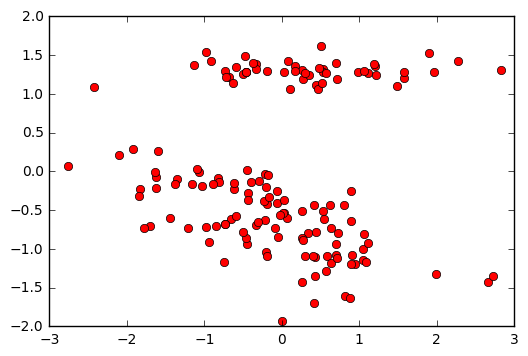

In [20]:
from sklearn import datasets
iris = datasets.load_iris() 
#print iris
iris_new,D,V = pca(iris.data,2)
#print iris_new
#print iris_new.shape, iris.data.shape
#print D,"\n", V
plt.plot(iris_new[:,0], iris_new[:,1], 'ro')
plt.show()

#print np.sum(D[:2])
#print iris_new

In [22]:
def odtworz(Y, D, V , X_std, X_mean):
    D_new = np.matrix(np.sqrt(D)).reshape(Y.shape[1],1)
    Y_new = np.multiply(D_new,Y.T).T
    Y_new = np.dot(Y_new, V.T)
    Z = np.multiply(X_std,Y_new) + X_mean
    return Z

iris_odtw = odtworz(iris_new, D, V, np.std(iris.data,axis=0), np.mean(iris.data,axis=0))
diff = iris.data - iris_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))/150

(150, 4)
blad sredniokwadratowy: 0.142273039678


In [24]:
def odtworz2(Y, D, V ):
    D_new = np.matrix(np.sqrt(D)).reshape(Y.shape[1],1)
    Y_new = np.multiply(D_new,Y.T).T
    Z = np.dot(Y_new, V.T)
    return Z

iris_std = (iris.data - np.mean(iris.data, axis = 0))/np.std(iris.data,axis = 0)
iris_odtw = odtworz2(iris_new, D, V)
diff = iris_std - iris_odtw 
print "blad sredniokwadratowy:",np.sum(np.sum(np.multiply(diff,diff), axis = 1))/150

#porownujac dane ustandaryzowane wyszedl odpowiedni blad -> suma mniej zanczacy wartosci wlasnych co sie zgadza z tym co bylo na wykladzie

blad sredniokwadratowy: 0.167960985541


In [6]:
#jakie znaczenie ma suma wartosci wlasnych?? bierzemy az suma bedzie wieksza niz 95% -> wyjasniony prcent waraincji

In [10]:
print D,V

[ 0.92740362  2.93035378] [[ 0.37231836 -0.52237162]
 [ 0.92555649  0.26335492]
 [ 0.02109478 -0.58125401]
 [ 0.06541577 -0.56561105]]
